<a href="https://colab.research.google.com/github/mdamanalam/csv-file-operations/blob/main/HomeAssesment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6 

In [2]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',FutureWarning)

In [3]:
#reading dataset
df=pd.read_csv(r'/content/CSUSHPISA.csv')
df.head()

,DATE,CSUSHPISA
0,1987-01-01,63.965
1,1987-02-01,64.424
2,1987-03-01,64.735
3,1987-04-01,65.132
4,1987-05-01,65.565


In [4]:
# Parser String to datetime type
df['DATE'] = pd.to_datetime(df['DATE'], infer_datetime_format=True)
indexedDataSet = df.set_index(['DATE'])

In [5]:
from datetime import datetime
indexedDataSet.head(5)


,CSUSHPISA
DATE,
1987-01-01,63.965
1987-02-01,64.424
1987-03-01,64.735
1987-04-01,65.132
1987-05-01,65.565


In [6]:
from datetime import datetime
indexedDataSet.tail(5)

,CSUSHPISA
DATE,
2022-02-01,290.371
2022-03-01,296.362
2022-04-01,301.409
2022-05-01,305.179
2022-06-01,306.181


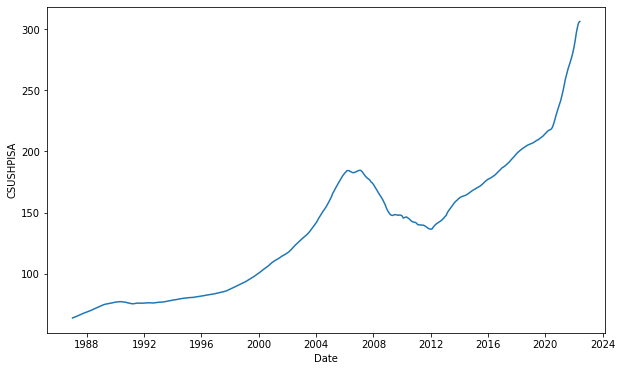

In [7]:
#Now We will Plot a Graph 

plt.xlabel("Date")
plt.ylabel("CSUSHPISA")
plt.plot(indexedDataSet)

In [8]:
# As we see the data is non stationary we Determine rolling Statistics 
rolmean = indexedDataSet.rolling(window = 12).mean()
# We have taken window of 12 months therofre the mean will be calculated over 12 months...
rolstd = indexedDataSet.rolling(window = 12).std()
print(rolmean, rolstd)

             CSUSHPISA
DATE                  
1987-01-01         NaN
1987-02-01         NaN
1987-03-01         NaN
1987-04-01         NaN
1987-05-01         NaN
...                ...
2022-02-01  267.937750
2022-03-01  272.159417
2022-04-01  276.454417
2022-05-01  280.675583
2022-06-01  284.563833

[426 rows x 1 columns]             CSUSHPISA
DATE                 
1987-01-01        NaN
1987-02-01        NaN
1987-03-01        NaN
1987-04-01        NaN
1987-05-01        NaN
...               ...
2022-02-01  13.950225
2022-03-01  14.271193
2022-04-01  14.702033
2022-05-01  15.099762
2022-06-01  15.164735

[426 rows x 1 columns]


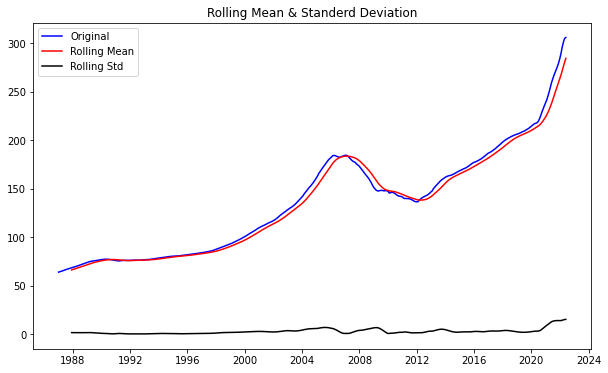

In [10]:
# Now lets plot rolling statistics part:

orig = plt.plot(indexedDataSet, color= 'Blue',label ='Original')
mean = plt.plot(rolmean, color ='red', label = 'Rolling Mean')
std = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Standerd Deviation')
plt.show(block=False)

In [11]:
## We can see mean and STD are not constant therfore  the data is non stationary

## Now we perform dickey-fuller test too 
from statsmodels.tsa.stattools import adfuller
print("Results of dickey-fuller Test : ")
dftest = adfuller(indexedDataSet ['CSUSHPISA'], autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4], index = ['Test Statistics','P-Value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

Results of dickey-fuller Test : 
Test Statistics                  0.837283
P-Value                          0.992215
#Lags Used                      18.000000
Number of Observations Used    407.000000
Critical Value (1%)             -3.446520
Critical Value (5%)             -2.868668
Critical Value (10%)            -2.570567
dtype: float64


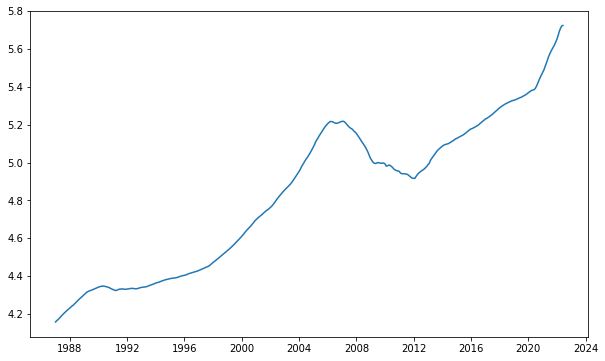

In [12]:
#Estimating Trend 
indexedDataSet_logScale = np.log(indexedDataSet)
plt.plot(indexedDataSet_logScale)

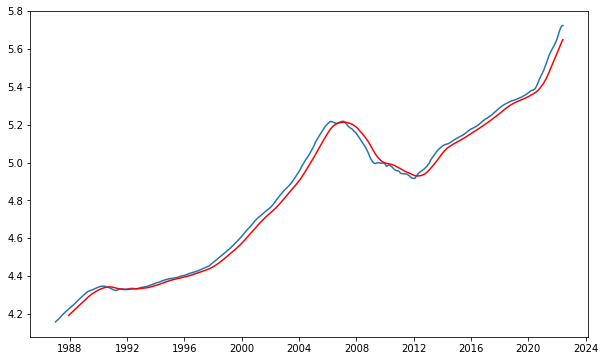

In [13]:
movingAverage = indexedDataSet_logScale.rolling(window = 12).mean()

movingSTD = indexedDataSet_logScale.rolling(window = 12).std()

plt.plot(indexedDataSet_logScale)
plt.plot(movingAverage, color = 'red')

In [14]:
datasetLogScaleMinusMovingAverage = indexedDataSet_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

# Remove Nan Values

datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(5)

,CSUSHPISA
DATE,
1987-12-01,0.033694
1988-01-01,0.032690
1988-02-01,0.032504
1988-03-01,0.031833
1988-04-01,0.030695


In [15]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    movingAverage = timeseries.rolling(window = 12).mean()
    movingSTD = timeseries.rolling(window = 12).std()

    # plotrolling Statistics : 

    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(movingAverage, color = 'red', label = 'Original')
    std = plt.plot(movingSTD, color = 'green', label = 'Original')

    plt.legend(loc = 'best')
    plt.title('Rolling Mean and Standerd Deviation')
    plt.show(block = False)

    print('Result of Dickey-Fuller Test: ')
    dftest = adfuller(timeseries['CSUSHPISA'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistics','P-Value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

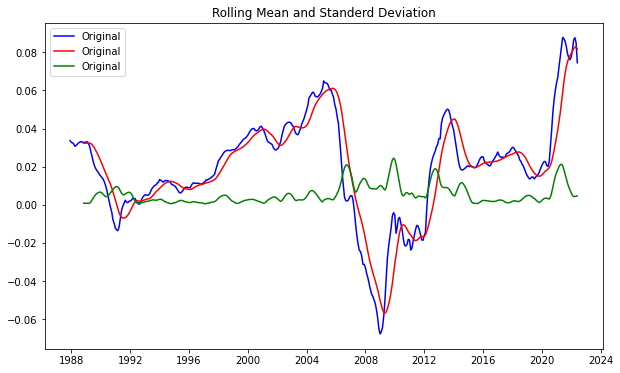

Result of Dickey-Fuller Test: 
Test Statistics                 -3.167356
P-Value                          0.021954
#Lags Used                      15.000000
Number of Observations Used    399.000000
Critical Value (1%)             -3.446846
Critical Value (5%)             -2.868811
Critical Value (10%)            -2.570643
dtype: float64


In [16]:
test_stationarity(datasetLogScaleMinusMovingAverage)

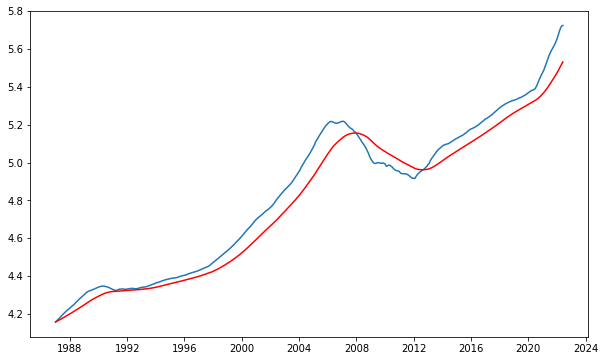

In [17]:
## Now We Will calculate Weighted average of the Series

exponentialDecayWeightedAverage = indexedDataSet_logScale.ewm(halflife = 12, min_periods = 0,adjust =True).mean()
plt.plot(indexedDataSet_logScale)
plt.plot(exponentialDecayWeightedAverage, color ='red')

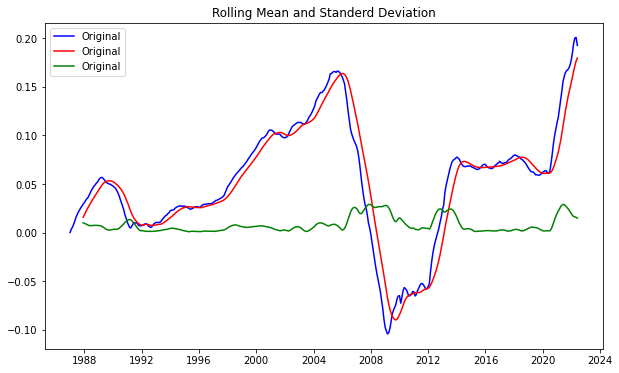

Result of Dickey-Fuller Test: 
Test Statistics                 -2.639197
P-Value                          0.085164
#Lags Used                      14.000000
Number of Observations Used    411.000000
Critical Value (1%)             -3.446361
Critical Value (5%)             -2.868598
Critical Value (10%)            -2.570530
dtype: float64


In [18]:
datasetLogScaleMinusMovingExponetialDecayAverage = indexedDataSet_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponetialDecayAverage)

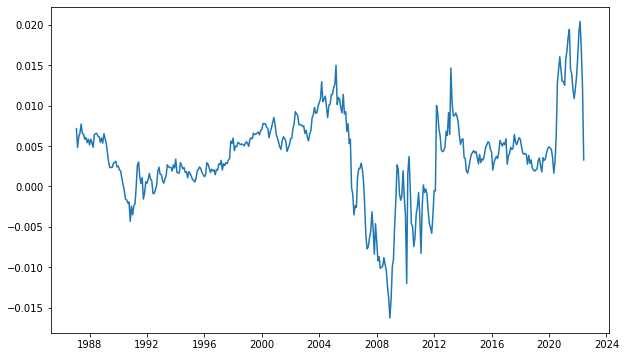

In [19]:
datasetLogDiffShifting = indexedDataSet_logScale - indexedDataSet_logScale.shift()
plt.plot(datasetLogDiffShifting)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


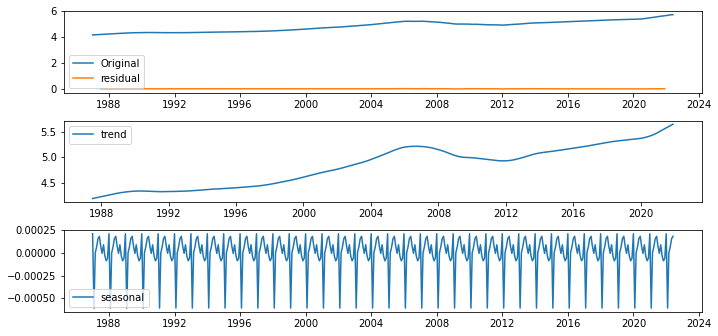

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompostion = seasonal_decompose(indexedDataSet_logScale)

trend = decompostion.trend
seasonal = decompostion.seasonal
residual = decompostion.resid

plt.subplot(411)
plt.plot(indexedDataSet_logScale, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'seasonal')
plt.legend(loc = 'best')
plt.subplot(411)
plt.plot(residual, label = 'residual')
plt.legend(loc = 'best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)

In [21]:
datasetLogDiffShifting.dropna(inplace = True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


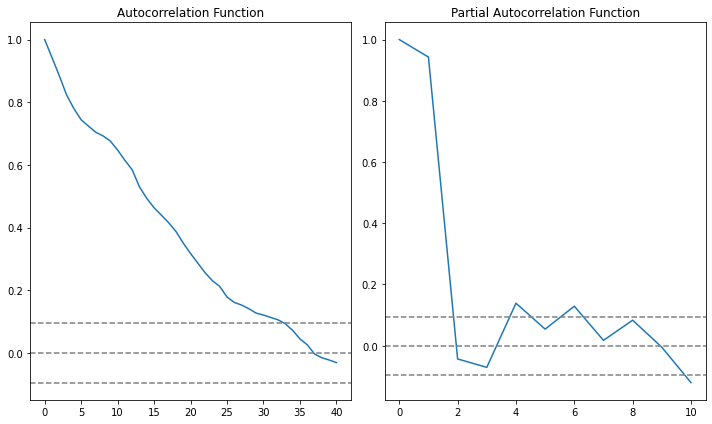

In [22]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags = 40)
lag_pacf = pacf(datasetLogDiffShifting, nlags = 10, method = 'ols')

# plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle = '--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle = '--', color = 'gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle = '--', color = 'gray')
plt.title('Autocorrelation Function')

# Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle = '--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle = '--', color = 'gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle = '--', color = 'gray')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

Plotting AR Model


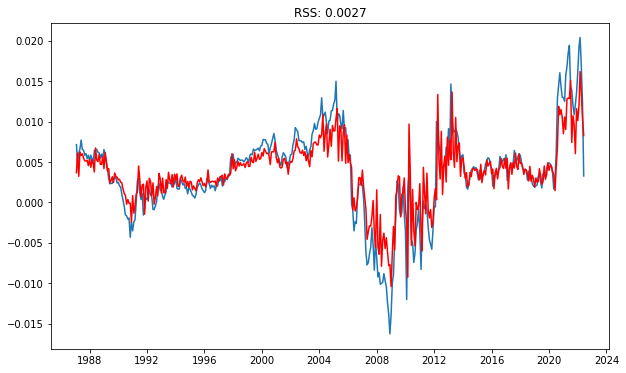

In [23]:
from statsmodels.tsa.arima_model import ARIMA

#AR Model 
model = ARIMA(indexedDataSet_logScale, order = (0, 1, 2))
results_AR = model.fit(disp = -1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color = 'red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting["CSUSHPISA"])**2))
print('Plotting AR Model')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting MA Model


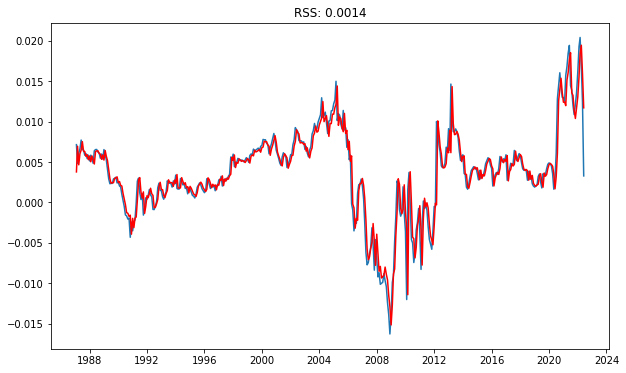

In [24]:
#MA Model 
model = ARIMA(indexedDataSet_logScale, order = (2, 1, 0))
results_MA = model.fit(disp = -1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color = 'red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting["CSUSHPISA"])**2))
print('Plotting MA Model')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting ARIMA Model


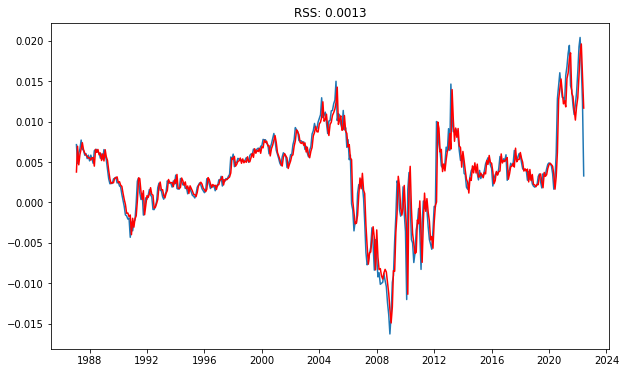

In [25]:
#ARIMA Model 
model = ARIMA(indexedDataSet_logScale, order = (2, 1, 2))
results_ARIMA = model.fit(disp = -1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color = 'red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting["CSUSHPISA"])**2))
print('Plotting ARIMA Model')

In [26]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues,copy = True)
print(predictions_ARIMA_diff.head())

DATE
1987-02-01    0.003762
1987-03-01    0.006954
1987-04-01    0.004652
1987-05-01    0.005934
1987-06-01    0.006624
dtype: float64


In [27]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

DATE
1987-02-01    0.003762
1987-03-01    0.010715
1987-04-01    0.015367
1987-05-01    0.021301
1987-06-01    0.027926
dtype: float64


In [28]:
predictions_ARIMA_log = pd.Series(indexedDataSet_logScale['CSUSHPISA'][10],index = indexedDataSet_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value = 0)
predictions_ARIMA_log.head()

DATE
1987-01-01    4.221080
1987-02-01    4.224842
1987-03-01    4.231795
1987-04-01    4.236447
1987-05-01    4.242381
dtype: float64

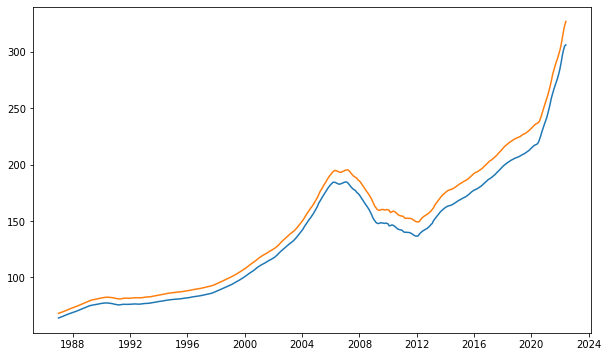

In [29]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataSet)
plt.plot(predictions_ARIMA)

In [30]:
indexedDataSet_logScale

,CSUSHPISA
DATE,
1987-01-01,4.158336
1987-02-01,4.165486
1987-03-01,4.170302
1987-04-01,4.176416
1987-05-01,4.183042
...,...
2022-02-01,5.671159
2022-03-01,5.691582
2022-04-01,5.708468


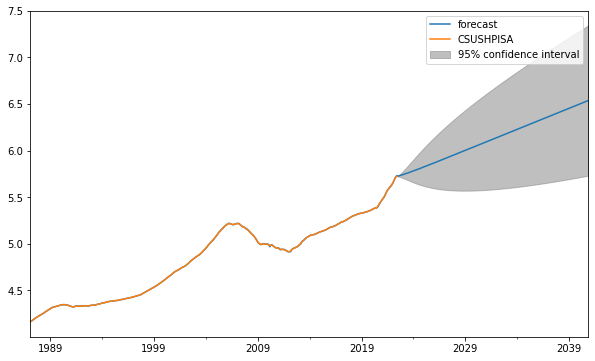

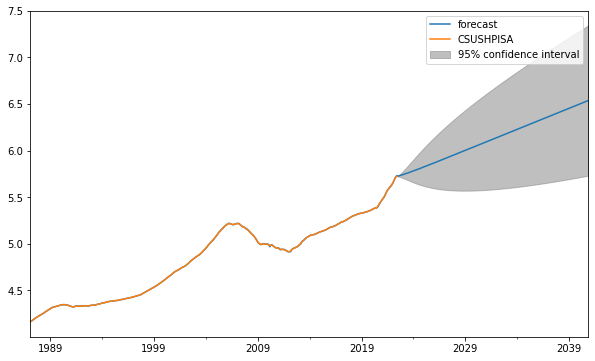

In [31]:
results_ARIMA.plot_predict(1, 646)

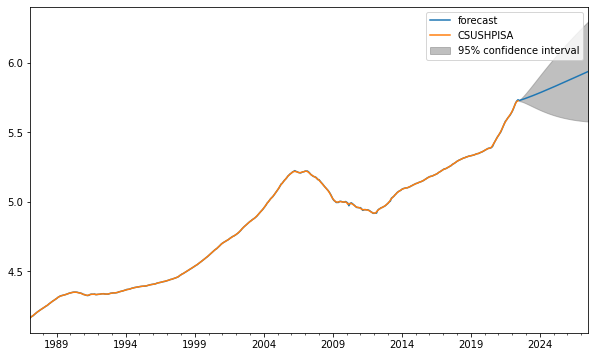

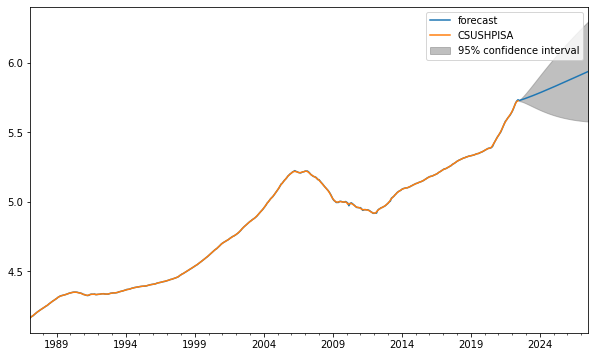

In [32]:
results_ARIMA.plot_predict(1, 486)

In [33]:
results_ARIMA.forecast(steps = 486)

(array([5.72679142, 5.72941574, 5.73217987, 5.73494498, 5.73783925,
        5.74072737, 5.74373517, 5.74673076, 5.74983761, 5.7529271 ,
        5.75612035, 5.75929191, 5.76256052, 5.76580379, 5.76913814,
        5.77244408, 5.77583574, 5.77919648, 5.78263812, 5.78604676,
        5.78953196, 5.7929825 , 5.79650567, 5.79999284, 5.80354909,
        5.80706831, 5.8106534 , 5.81420066, 5.81781085, 5.82138265,
        5.8250147 , 5.828608  , 5.83225907, 5.83587118, 5.83953881,
        5.8431674 , 5.84684944, 5.85049248, 5.85418702, 5.85784273,
        5.86154815, 5.86521497, 5.86892984, 5.87260641, 5.87632947,
        5.8800146 , 5.88374477, 5.88743742, 5.89117374, 5.89487302,
        5.89861467, 5.90231977, 5.90606602, 5.90977625, 5.91352648,
        5.91724124, 5.92099489, 5.92471364, 5.92847024, 5.93219252,
        5.93595165, 5.93967706, 5.94343835, 5.94716653, 5.95092967,
        5.95466031, 5.95842503, 5.96215785, 5.96592392, 5.96965868,
        5.97342587, 5.97716238, 5.98093052, 5.98